# 변수선택법

### 전진선택법,후진소거법,단계적 선택법 있습니다.

### 그렇다면 변수선택을 따로 해주는 이유가 뭘까요???

##### 그 이유는 다중공선성이 너무 높은 변수들을 사용하게 되면 데이터 분석의 신뢰성이나 예측 정확도를 떨어뜨리기 때문입니다. 이러한 문제를 제거하기 위해서 변수 선택이 매우 중요합니다.

In [161]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 불러오기

corolla = pd.read_csv("./ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [162]:
# 데이터 수와 변수의 수 확인하기

nCar = corolla.shape[0] # 행 
nVar = corolla.shape[1] # 열 

print(nCar,nVar)                       # 1436-row , 37-col

corolla.info()

1436 37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Gu

### 37개의 컬럼 중에 Model컬럼과 Fuel_type 컬럼이 object인 것을 확인할 수 있음

In [163]:
# Model 변수 확인

corolla.Model.unique() ## 이것은 특정 고유의 값임을 확인할 수 있고,

array(['TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors',
       '?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors',
       'TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors',
       '?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors',
       'TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors',
       '?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors',
       '?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors',
       'TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors',
       'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-Doors',
       'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors',
       '?TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors',
       '?TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2/3-Doors',
       'TOYOTA Corolla 1.6 16v L.SOL 2/3-Doors',
       'TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors',
       '?TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors',
       'TOYOTA Corolla 1.6 16V VVT I 3DR SOL AUT4 2/3-Doors',
       'TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors',
       '?T

In [164]:
# Fuel_Type 변수 확인

corolla.Fuel_Type.unique() # 이것은 우리가 변환해줄 수 있음
## 왜 변환을 해주지??  데이터 분석을 하려면 컴퓨터가 알아듣기 위해서 숫자로 바꿔줘야하기 때문에

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

#### 범주형 변수를 이진형 변수로 변환

In [165]:
# 가변수 생성

dummy_p = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)

dummy_p

array([0, 0, 0, ..., 0, 0, 0])

앞에서 corolla.shape[0]을 통해 만들어 주었던 nCar을 사용하여 col개수와 같은 ndarray형태의 "0"데이터 변수를 생성했다. 이는 각각 Fuel_Type - Diesel, Petrol, CNG를 이진형 변수 ( 0 or 1 ) 로 만들어 주기 위한 가변수이다.

In [166]:
# boolean 인덱싱을 통해 boolean index 행렬 생성

p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

p_idx

array([False, False, False, ...,  True,  True,  True])

근데 왜 여기서 우리가 1,2,3을 하지 않고 더미변수를 생성을 해줄까???

#### 그것은 바로 1,2,3에서 숫자의 크기가 모델의 성능에 영향을 줄 수 있기 때문에!!!

In [167]:
# boolean index 행렬을 사용하여 가변수에 대입 ( True = 1, False = 0 )

dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

dummy_p

array([0, 0, 0, ..., 1, 1, 1])

***불필요한 변수를 제거하고 가변수를 붙여주는 작업***

 현재 데이터 셋에 37개의 변수(column 수)가 존재한다. 여기서 "Model"이름이나 "ID"같은 변수는 자동차의 가격에 영향을 미치는 변수가 아니라 그냥 고유 번호 및 이름을 나타내는 변수이기에 삭제한다. 그리고 새로 생성한 이진형 가변수를 붙여주기 위해 "Fuel_Type(범주형 기존변수)"를 삭제할 필요가 있다.

In [168]:
# 행렬로 존재하는 가변수 -> 데이터프레임으로 전환

Fuel = pd.DataFrame({"Petrol" : dummy_p, "Diesel" : dummy_d, "CNG" : dummy_c})
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [169]:
# 불필요한 변수 삭제 및 가변수 붙이기

corolla_ = corolla.drop(["Id","Model","Fuel_Type"],axis = 1, inplace = False)
mlr_data = pd.concat((corolla_,Fuel),1)
mlr_data.head()

C:\Users\jangd\AppData\Local\Temp\ipykernel_4292\181276066.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  mlr_data = pd.concat((corolla_,Fuel),1)


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [170]:
# bias를 위한 상수항 추가

#회귀분석모형 수식을 간단하게 만들기 위해 
#다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 한다.
# 상수항 결합을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

mlr_data = sm.add_constant(mlr_data, has_constant = "add")
mlr_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


### 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할


In [171]:
feature_columns = mlr_data.columns.difference(["Price"]) # Target column 빼기

X = mlr_data[feature_columns]
y = mlr_data.Price

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


행이나 열이 1값이라면 위에 처럼 생략됨

In [172]:
# train & 회귀모델 적합

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     347.5
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:40:16   Log-Likelihood:                -8415.2
No. Observations:                1005   AIC:                         1.690e+04
Df Residuals:                     971   BIC:                         1.707e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -263.6102    127.474     -2.068      0.039    -513.766     -13.454
Age_08_04         -117.1821      4.006    -29.251      0.000    -125.044    -109.320
Airbag_1           486.3753    266.305      1.826      0.068     -36.225    1008.975
Airbag_2          -133.3178    127.415     -1.046      0.296    -383.359     116.723
Airco              162.0667     92.012      1.761      0.078     -18.498     342.632
Automatic          106.6512    151.783      0.703      0.482    -191.209     404.512
Automatic_airco   2240.1795    191.166     11.718      0.000    1865.033    2615.326
BOVAG_Guarantee    536.0079    127.379      4.208      0.000     286.037     785.978
Backseat_Divider  -315.4871    127.222     -2.480      0.013    -565.148     -65.826
Boardcomputer     -280.7983    120.486     -2.331      0.020    -517.240     -44.356
CD_Player          152.4476    100.973      1.510      0.131     -45.703     350.598
CNG              -1001.6471    220.033     -4.552      0.000   -1433.442    -569.853
Central_Lock      -145.5790    142.396     -1.022      0.307    -425.018     133.860
Cylinders           -0.0400      0.002    -17.629      0.000      -0.044      -0.036
Diesel            -566.3382    191.744     -2.954      0.003    -942.619    -190.058
Doors              -71.9631     41.561     -1.732      0.084    -153.522       9.596
Gears              -16.4481    188.410     -0.087      0.930    -386.187     353.290
Guarantee_Period    63.8876     13.567      4.709      0.000      37.263      90.512
HP                  11.2467      3.568      3.152      0.002       4.245      18.248
KM                  -0.0158      0.001    -12.305      0.000      -0.018      -0.013
Met_Color           50.2679     76.922      0.653      0.514    -100.685     201.221
Metallic_Rim       251.7189     99.090      2.540      0.011      57.264     446.174
Mfg_Month         -102.2522     10.422     -9.812      0.000    -122.704     -81.801
Mfg_Year            -1.7586      0.884     -1.990      0.047      -3.493      -0.024
Mfr_Guarantee      267.2154     75.246      3.551      0.000     119.552     414.879
Mistlamps          -83.9810    111.795     -0.751      0.453    -303.369     135.407
Petrol            1567.9753    196.913      7.963      0.000    1181.551    1954.400
Power_Steering      54.4089    299.675      0.182      0.856    -533.676     642.494
Powered_Windows    531.4883    142.692      3.725      0.000     251.469     811.508
Quarterly_Tax       17.1199      1.857      9.217      0.000      13.475      20.765
Radio              583.9276    776.728      0.752      0.452    -940.331    2108.186
Radio_cassette    -691.9921    777.868     -0.890      0.374   -2218.488     834.504
Sport_Model        174.4909     90.190      1.935      0.053      -2.498     351.480
Tow_Bar           -183.

 위의 R^2를 보면 0.901로 매우 높은 편이다. 
 그리고 이렇게 변수가 많아질 수록 변수 하나하나에 대한 신뢰도는 떨어진다. Warnings를 보면 강한 다중공선성문제가 있을 수 있다고 말하고 있다. VIF를 통해 다중공선성을 확인해보자.

In [173]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

c:\Users\jangd\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\jangd\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


price, radio, radio_cassetee, Petro.,Diesel,CNG 값이 다중 공선성이 높은 것을 확인할 수 있음

단계적 선택법 함수는 본인들이 직접 짜는 것,,, 입맞에 맞게 짜면 됨

### AIC는 낮을수록 좋은 것!!!

여기서 AIC란 무엇인가?

모델을 선택하는 방법에는 다양한 방법 이 있지만, 모델 선택법 중 하나인 AIC는 최소의 정보 손실을 갖는 모델이 가장 데이터와 적합한 모델로 선택되는 방법이다. 

​

변수가 많은 모델이라면(p가 큰) RSS(=잔차제곱합)는 작아지게 됩니다. 결국 AIC, BIC를 최소화 한다는 뜻은 우도(likelihood)를 가장 크게 하는 동시에 변수 갯수는 가장 적은 최적의 모델(parsimonious & explainable)을 의미하게 되는 것입니다. 

## 여기서 또 우도란?

https://mac-user-guide.tistory.com/182

Bias(편향)는 변수를 제거하면서 생기는 오류이고 Variance(분산)는 변수가 증가하면서 생기는 오류입니다. 우도를 사용하는 것은 아래 그림과 같이 변수 갯수에 따른 bias와 variance 관계에서 최적의 모델 선택을 위한 균형점을 제시하기 위한 것입니다.

 

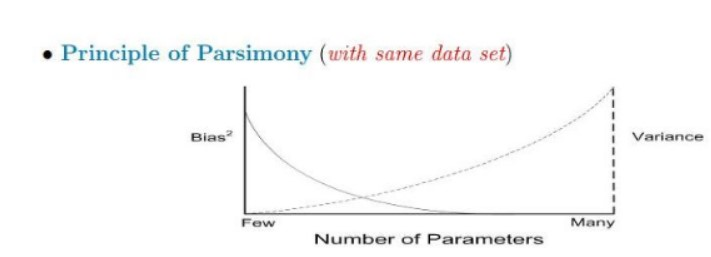

In [174]:
from IPython.display import Image
Image('편향과분산.jpg')

AIC의 공식은 아래와 같다.


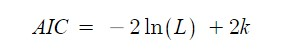

In [175]:
from IPython.display import Image
Image('공식.jpg')

여기서  -2ln(L) 은 모형의 적합도를 의미하며, k는 모형의 추정된 파라미터의 개수이다. -2ln(L)에서 L은 Likelihood function 을 의미하며, AIC 값이 낮다는 것은 즉 모형의 적합도가 높은 것을 의미한다.

(모형의 적합도란 실제 자료와 연구자의 연구 모형이 얼마나 부합하는지 평가하는 것)

​

 다시 정리해보면 -2Log(Likelihood)는 모형의 적합도를 의미하고, p는 모형의 추정된 파라미터의 개수를 의미하며 해당 모형에 패널티를 주기 위해 사용합니다. 
 
 실제로 어떤 모형이 적합도(-2Log(Likelihood))를 높이기 위해 여러 불필요한 파라미터를 사용할 수도 있습니다. 실제 모형 비교 시 독립변수가 많은 모형이 적합도 면에서 유리하게 되는데, 이는 독립변수에 따라서 모형의 적합도에 차이가 난다는 의미입니다. 따라서 이를 상쇄시키기 위하여 불필요한 파라미터, 독립변수의 수가 증가할수록 2k를 증가시켜 패널티를 부여하여 모델의 품질을 평가합니다.

 

따라서 2k가 증가할수록 AIC 값이 증가하게 되므로 좋지 않은 모형이 된다고 볼 수 있습니다.

### AIC와 비슷한 BIC란?

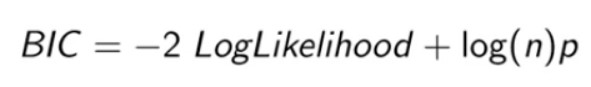

In [176]:
Image('bic.jpg')

AIC와 유사하지만 마지막 패널티를 수정함으로써 AIC를 보완했습니다. BIC의 경우 변수가 많을 수록 AIC보다 더 페널티를 가하는 성격을 가집니다. 예를 들어 BIC의 우변 log(n)p 에서 보통 n이 8이상이므로 log(8)>2가 됩니다. 따라서 AIC 보다 변수 증가에 더 민감해 변수 갯수가 작은 것이 우선 순위라면 AIC보다 BIC를 참고하는게 좋습니다.

https://topo314.tistory.com/60

In [177]:

#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=train_x,y=train_y,feature_set=feature_columns[0:5]))
 

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F385E2A580>, 'AIC': 19080.00312636597}


In [178]:
# 전체 변수의 AIC test

processSubset(x=train_x, y=train_y, feature_set = feature_columns) 

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1f381a28eb0>,
 'AIC': 16898.384970523686}

In [179]:
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel
 
print(getBest(x=train_x,y=train_y,k=2))
 


Processed 630 models on 2 predictors in 0.5760006904602051 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17552.026203
Name: 211, dtype: object


 위의 함수는 전체 변수의 가능한 조합을 모두 확인하는 함수이다. 좋은 변수를 선택하여 모델을 만들 수 있겠지만, 문제는 변수의 총 수와 k가 증가할때마다 시간이 기하급수적으로 증가하는 문제가 생긴다. 그렇기 때문에 "변수를 선택하는 방법"을 선정해야한다. 

https://acdongpgm.tistory.com/103

In [180]:
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])

In [181]:
forwordBestModel=forward_model(train_x,train_y)
 
forwordBestModel.summary()

Processed  36 models on 1 predictors in 0.0319981575012207
Selected predictors: ['Mfg_Year', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F385EAA4F0>
Processed  35 models on 2 predictors in 0.03200364112854004
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F385E72F40>
Processed  34 models on 3 predictors in 0.031016826629638672
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F385E71250>
Processed  33 models on 4 predictors in 0.03399229049682617
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F385E71A30>
Processed  32 models on 5 predictors in 0.03500962257385254
Selected predictors: ['Mfg_Year', 'Automatic_airc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     500.2
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:40:19   Log-Likelihood:                -8418.4
No. Observations:                1005   AIC:                         1.688e+04
Df Residuals:                     981   BIC:                         1.700e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1218.1415    123.930      9.829      0.000     974.943    1461.340
Automatic_airco   2192.0313    180.325     12.156      0.000    1838.165    2545.898
Weight              17.2584      1.275     13.534      0.000      14.756      19.761
KM                  -0.0160      0.001    -12.532      0.000      -0.018      -0.013
HP                   8.8295      3.116      2.833      0.005       2.714      14.945
Powered_Windows    397.8248     85.849      4.634      0.000     229.356     566.293
BOVAG_Guarantee    543.6382    125.564      4.330      0.000     297.233     790.044
Guarantee_Period    63.0196     13.425      4.694      0.000      36.675      89.365
Quarterly_Tax       16.9070      1.823      9.272      0.000      13.329      20.485
Petrol            2297.4401    283.437      8.106      0.000    1741.228    2853.652
Metallic_Rim       225.2499     92.272      2.441      0.015      44.177     406.322
Mfr_Guarantee      269.3478     74.286      3.626      0.000     123.570     415.126
Airbag_2          -124.7837    124.296     -1.004      0.316    -368.701     119.133
Sport_Model        186.5291     87.049      2.143      0.032      15.706     357.352
Backseat_Divider  -327.4466    123.825     -2.644      0.008    -570.439     -84.454
Tow_Bar           -186.4021     79.476     -2.345      0.019    -342.364     -30.440
Airbag_1           560.6604    222.820      2.516      0.012     123.402     997.919
ABS               -270.0065    124.923     -2.161      0.031    -515.154     -24.859
Boardcomputer     -271.4890    119.031     -2.281      0.023    -505.073     -37.905
CD_Player          180.4266     96.673      1.866      0.062      -9.283     370.136
Doors              -79.8002     39.990     -1.995      0.046    -158.276      -1.324
Airco              137.9359     87.681      1.573      0.116     -34.127     309.999
Age_08_04          -14.7244     10.291     -1.431      0.153     -34.920       5.471
const            -2.447e+06   2.48e+05     -9.859      0.000   -2.93e+06   -1.96e+06
==============================================================================
Omnibus:                       77.451   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.262
Skew:                           0.262   Prob(JB):                     4.65e-65
Kurtosis:                       5.608   Cond. No.                     5.77e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

변수를 계속 추가하며 AIC가 증가하는 경우가 생기면, 이전 모델을 선택하는 학습과정을 진행한다. 

**전진선택법 AIC**

In [182]:
forwordBestModel.aic

16884.865979692382

# 후진제거법

In [183]:
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])


In [184]:
backwardBestModel = backword_model(train_x,train_y)

Processed 36 models on 35 predictors in 0.291003942489624
Selected predictors : ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F385E8F040>
Processed 35 models on 34 predictors in 0.2499990463256836
Selected predictors : ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'M

In [185]:
backwardBestModel.aic

16896.39285851956

In [186]:
backwardBestModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     358.7
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:40:22   Log-Likelihood:                -8415.2
No. Observations:                1005   AIC:                         1.690e+04
Df Residuals:                     972   BIC:                         1.706e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -263.8508    127.379     -2.071      0.039    -513.820     -13.881
Age_08_04         -117.1715      4.002    -29.277      0.000    -125.025    -109.317
Airbag_1           486.8678    266.109      1.830      0.068     -35.347    1009.083
Airbag_2          -133.7232    127.266     -1.051      0.294    -383.470     116.024
Airco              161.8284     91.924      1.760      0.079     -18.565     342.221
Automatic          107.9821    150.938      0.715      0.475    -188.221     404.185
Automatic_airco   2240.9430    190.869     11.741      0.000    1866.381    2615.505
BOVAG_Guarantee    535.6670    127.254      4.209      0.000     285.942     785.392
Backseat_Divider  -314.9916    127.030     -2.480      0.013    -564.277     -65.707
Boardcomputer     -280.1359    120.185     -2.331      0.020    -515.988     -44.284
CD_Player          152.9119    100.781      1.517      0.130     -44.862     350.686
CNG               -999.2174    218.154     -4.580      0.000   -1427.324    -571.110
Central_Lock      -145.4917    142.320     -1.022      0.307    -424.781     133.798
Cylinders           -0.0401      0.002    -19.057      0.000      -0.044      -0.036
Diesel            -567.3148    191.320     -2.965      0.003    -942.762    -191.867
Doors              -71.3668     40.975     -1.742      0.082    -151.776       9.042
Guarantee_Period    63.8878     13.560      4.711      0.000      37.277      90.498
HP                  11.2044      3.533      3.172      0.002       4.272      18.137
KM                  -0.0158      0.001    -12.342      0.000      -0.018      -0.013
Met_Color           49.9833     76.814      0.651      0.515    -100.757     200.723
Metallic_Rim       250.3651     97.819      2.559      0.011      58.404     442.326
Mfg_Month         -102.2244     10.411     -9.818      0.000    -122.656     -81.793
Mfg_Year            -1.7990      0.753     -2.389      0.017      -3.276      -0.322
Mfr_Guarantee      267.3907     75.181      3.557      0.000     119.855     414.926
Mistlamps          -85.2959    110.719     -0.770      0.441    -302.572     131.980
Petrol            1566.5221    196.108      7.988      0.000    1181.678    1951.366
Power_Steering      54.6149    299.513      0.182      0.855    -533.151     642.381
Powered_Windows    531.6169    142.611      3.728      0.000     251.755     811.478
Quarterly_Tax       17.1105      1.853      9.233      0.000      13.474      20.747
Radio              583.8031    776.330      0.752      0.452    -939.672    2107.279
Radio_cassette    -692.0515    777.470     -0.890      0.374   -2217.765     833.662
Sport_Model        173.4038     89.280      1.942      0.052      -1.800     348.608
Tow_Bar           -183.6840     81.462     -2.255      0.024    -343.546     -23.822
Weight              16.

In [187]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 


In [188]:
stepwiseBestModel = Stepwise_model(train_x,train_y)


Processed  36 models on 1 predictors in 0.035996198654174805
Selected predictors: ['Mfg_Year', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F3860D5370>
forward
Processed 1 models on 0 predictors in 0.002020597457885742
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F3860D5F70>
Processed  35 models on 2 predictors in 0.03398418426513672
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F3860D48E0>
forward
Processed 2 models on 1 predictors in 0.002002716064453125
Selected predictors : ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F3860C0340>
Processed  34 models on 3 predictors in 0.03100132942199707
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] AIC :  <statsmodels.regression.linear_

In [189]:
stepwiseBestModel.aic


16883.880848689572

In [190]:
stepwiseBestModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     547.1
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:40:26   Log-Likelihood:                -8419.9
No. Observations:                1005   AIC:                         1.688e+04
Df Residuals:                     983   BIC:                         1.699e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1383.9906     45.690     30.291      0.000    1294.329    1473.652
Automatic_airco   2181.4863    180.232     12.104      0.000    1827.803    2535.169
Weight              17.3365      1.271     13.639      0.000      14.842      19.831
KM                  -0.0162      0.001    -12.844      0.000      -0.019      -0.014
HP                   8.9250      3.117      2.863      0.004       2.807      15.043
Powered_Windows    409.8748     85.359      4.802      0.000     242.369     577.381
BOVAG_Guarantee    547.3182    125.586      4.358      0.000     300.872     793.765
Guarantee_Period    66.9444     13.208      5.069      0.000      41.026      92.863
Quarterly_Tax       16.5262      1.793      9.215      0.000      13.007      20.046
Petrol            2239.1896    281.453      7.956      0.000    1686.871    2791.508
Metallic_Rim       227.8436     92.304      2.468      0.014      46.709     408.979
Mfr_Guarantee      265.1436     74.274      3.570      0.000     119.390     410.898
Sport_Model        187.0990     86.483      2.163      0.031      17.387     356.811
Backseat_Divider  -366.2459    117.362     -3.121      0.002    -596.555    -135.937
Tow_Bar           -190.9349     79.427     -2.404      0.016    -346.801     -35.069
Airbag_1           561.9672    222.875      2.521      0.012     124.602     999.333
ABS               -331.3238    103.651     -3.197      0.001    -534.726    -127.922
Boardcomputer     -265.0662    117.584     -2.254      0.024    -495.811     -34.321
CD_Player          175.0607     96.575      1.813      0.070     -14.457     364.578
Doors              -77.4686     39.937     -1.940      0.053    -155.839       0.902
Airco              139.5713     86.951      1.605      0.109     -31.059     310.202
Cylinders         -6.54e+05   2.14e+04    -30.537      0.000   -6.96e+05   -6.12e+05
const            -1.635e+05   5354.114    -30.537      0.000   -1.74e+05   -1.53e+05
==============================================================================
Omnibus:                       76.365   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.372
Skew:                           0.250   Prob(JB):                     1.20e-64
Kurtosis:                       5.604   Cond. No.                     2.77e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.01e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


## 성능평가

변수선택법에 따라 선택된 변수개수

변수 총 37개

In [191]:
# number of params
print(forwordBestModel.params.shape, backwardBestModel.params.shape, stepwiseBestModel.params.shape)

(24,) (36,) (23,)


In [193]:
#모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = forwordBestModel.predict(test_x[forwordBestModel.model.exog_names])
pred_y_backward = backwardBestModel.predict(test_x[backwardBestModel.model.exog_names])
pred_y_stepwise = stepwiseBestModel.predict(test_x[stepwiseBestModel.model.exog_names])

In [194]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인할 예정

perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD        BACKWARD        STEPWISE
MSE   1574079.236279  1591033.940616  1573514.814825  1598153.767342
RMSE     1254.623145     1261.361939     1254.398188     1264.181066
MAE        868.58287      868.864091      868.370072      870.450125
MAPE        8.788813        8.793486        8.786474        8.801283
